In [1]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
mlflow.set_tracking_uri("file:///c:/Users/yijin/mlops-customer-churn/mlruns")

In [2]:
mlflow.set_experiment("Customer-Churn-Classifier")
sns.set(style="whitegrid")

In [3]:
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name("Customer-Churn-Classifier")
runs = mlflow.search_runs(experiment_names=["Customer-Churn-Classifier"], output_format="pandas")
print(runs.columns.tolist())

['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time', 'end_time', 'metrics.precision', 'metrics.accuracy', 'metrics.recall', 'metrics.f1_score', 'params.max_depth', 'params.n_estimators', 'params.model_type', 'params.learning_rate', 'params.class_weight', 'params.max_iter', 'tags.mlflow.log-model.history', 'tags.mlflow.source.name', 'tags.mlflow.runName', 'tags.mlflow.source.type', 'tags.mlflow.source.git.commit', 'tags.mlflow.user']


In [4]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
experiment = client.get_experiment_by_name("Customer-Churn-Classifier")
runs = client.search_runs(experiment_ids=[experiment.experiment_id], max_results=50)

In [5]:
data = []
for run in runs:
    run_info = {
        "run_id": run.info.run_id,
        "start_time": run.info.start_time,
        "model_type": run.data.params.get("model_type", None),
        "n_estimators": run.data.params.get("n_estimators", None),
        "max_depth": run.data.params.get("max_depth", None),
        "learning_rate": run.data.params.get("learning_rate", None),
        "accuracy": run.data.metrics.get("accuracy", None),
        "f1_score": run.data.metrics.get("f1_score", None),
        "precision": run.data.metrics.get("precision", None),
        "recall": run.data.metrics.get("recall", None),
    }
    data.append(run_info)

# Create a DataFrame
runs_df = pd.DataFrame(data)

# Sort by f1_score
runs_df = runs_df.sort_values("f1_score", ascending=False)

# Display the top results
runs_df.head()

,run_id,start_time,model_type,n_estimators,max_depth,learning_rate,accuracy,f1_score,precision,recall
13,d054b7f7adfc43fd90a9246e2ec5eb60,1746280636931,RandomForestClassifier,200,10,None,0.761905,0.612717,0.539715,0.708556
9,53b51b3bf7314ad39b2db4ba5c0ea44f,1746280674719,RandomForestClassifier,200,10,N/A,0.761905,0.612717,0.539715,0.708556
21,254170ea13614fe7beee8b58c9a7388f,1746280417664,RandomForestClassifier,200,10,None,0.761905,0.612717,0.539715,0.708556
28,08cf9e5fe09746c6ab810e6f8d4a2da0,1746268475370,RandomForestClassifier,200,10,None,0.761905,0.612717,0.539715,0.708556
17,588867465d7e4dc58740da1812a026f2,1746280616585,RandomForestClassifier,200,10,N/A,0.761905,0.612717,0.539715,0.708556


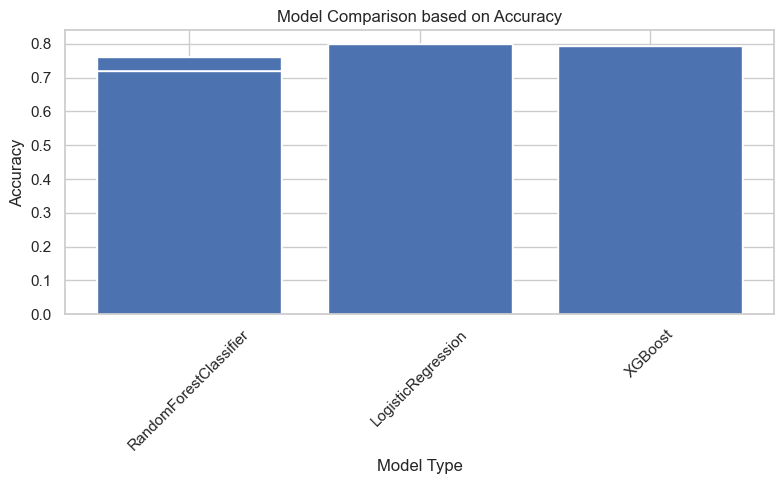

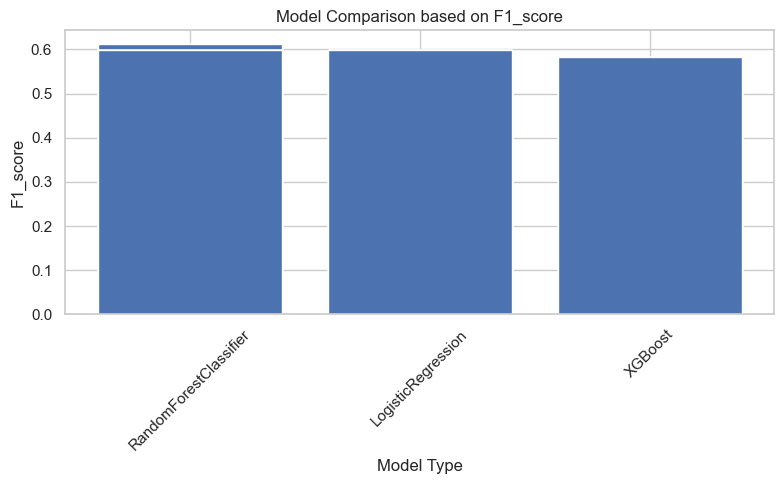

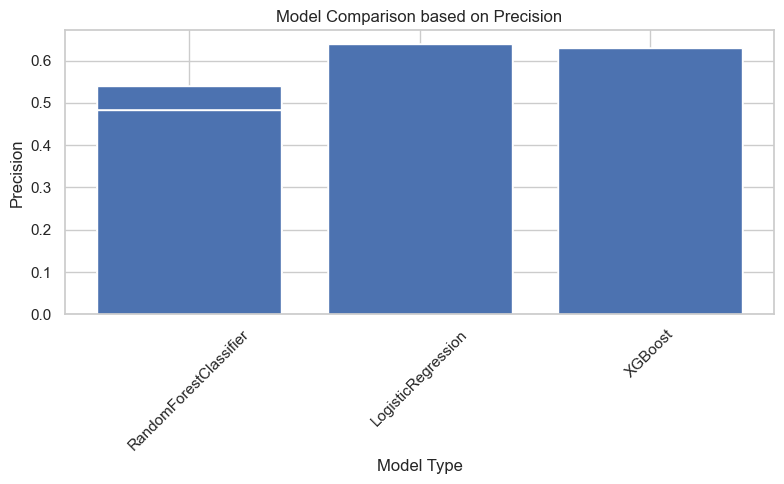

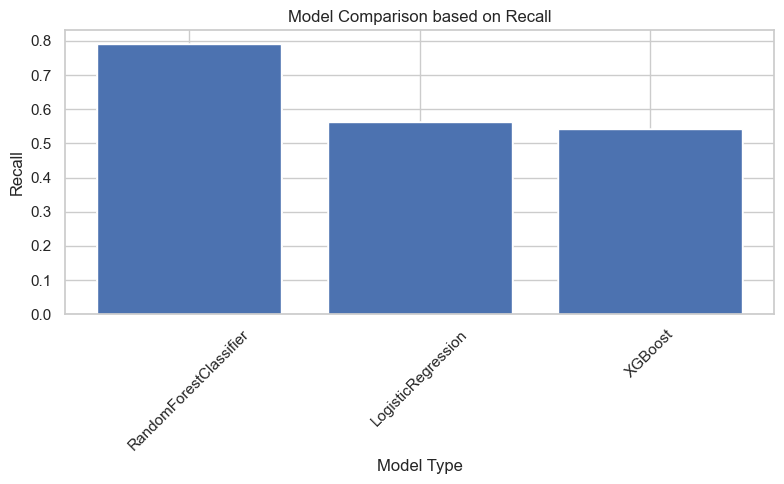

In [6]:
metrics = ["accuracy", "f1_score", "precision", "recall"]
model_types = runs_df["model_type"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.bar(model_types, runs_df[metric])
    plt.title(f"Model Comparison based on {metric.capitalize()}")
    plt.xlabel("Model Type")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [7]:
best_run = runs_df.iloc[0]
print("Best Model:")
print(best_run)

Best Model:
run_id           d054b7f7adfc43fd90a9246e2ec5eb60
start_time                          1746280636931
model_type                 RandomForestClassifier
n_estimators                                  200
max_depth                                      10
learning_rate                                None
accuracy                                 0.761905
f1_score                                 0.612717
precision                                0.539715
recall                                   0.708556
Name: 13, dtype: object


In [16]:
import mlflow
import mlflow.sklearn
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

best_run_id = best_run['run_id']
logged_model = f"runs:/{best_run_id}/model"

# Load model
model = mlflow.sklearn.load_model(logged_model)

# Load new data (replace with the actual path to your new data)
new_data = joblib.load("C:/Users/yijin/mlops-customer-churn/data/processed/X_test.pkl")
new_label = joblib.load("C:/Users/yijin/mlops-customer-churn/data/processed/y_test.pkl")

X_new = new_data
y_true = new_label

y_pred = model.predict(X_new)
print("Accuracy:", accuracy_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))

Accuracy: 0.7619047619047619
F1 Score: 0.6127167630057804
Precision: 0.539714867617108
Recall: 0.7085561497326203
